# Homework 1

Note: I was trying to keep this very organized but at some point I gave up. If you do rerun the notebook, run all cells from top to bottom c:

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

    I am most likely going to omit "acceleration" from my list of possible independent variables as it has the smallest absolute value in correlation with "mpg." The closer to 0, the less correlation it has with the attribute. The other attributes have a stronger negative correlation, meaning that less of that attribute will lead to higher "mpg."

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

In [1]:
#import necessary libraries
import seaborn
import numpy
import pandas
import matplotlib.pyplot as plt

In [2]:
#load auto-mpg dataset
mpg = pandas.read_csv('auto-mpg.csv')
display(mpg)

,mpg,displacement,horsepower,weight,acceleration,origin
0,18.0,307.0,130.0,3504.0,12.0,USA
1,15.0,350.0,165.0,3693.0,11.5,USA
2,18.0,318.0,150.0,3436.0,11.0,USA
3,16.0,304.0,150.0,3433.0,12.0,USA
4,17.0,302.0,140.0,3449.0,10.5,USA
...,...,...,...,...,...,...
387,27.0,140.0,86.0,2790.0,15.6,USA
388,44.0,97.0,52.0,2130.0,24.6,Europe
389,32.0,135.0,84.0,2295.0,11.6,USA
390,28.0,120.0,79.0,2625.0,18.6,USA


In [3]:
#remove origin column bc not computative
new_mpg = mpg.drop('origin', inplace = False, axis=1)
display(new_mpg)

,mpg,displacement,horsepower,weight,acceleration
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...
387,27.0,140.0,86.0,2790.0,15.6
388,44.0,97.0,52.0,2130.0,24.6
389,32.0,135.0,84.0,2295.0,11.6
390,28.0,120.0,79.0,2625.0,18.6


<Axes: >

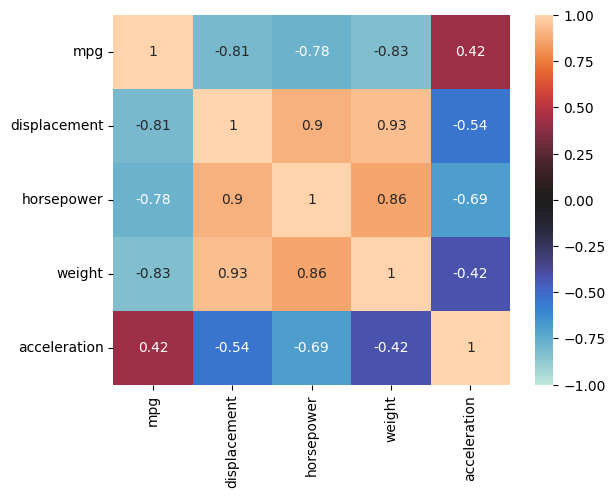

In [4]:
#display heatmap with annotations; center = 0, color range = [-1,1]
seaborn.heatmap(new_mpg.corr(), annot = True, center = 0, vmin = -1, vmax = 1)

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

    If we are using 'horsepower' to predict 'mpg,' I would use a polynomial regression. We can see that the shape produced in either pairplot for 'mpg x horsepower' looks very similar to f(x)=x^2. We can see a negative correlation from horsepower to mpg in the form of x^2.

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

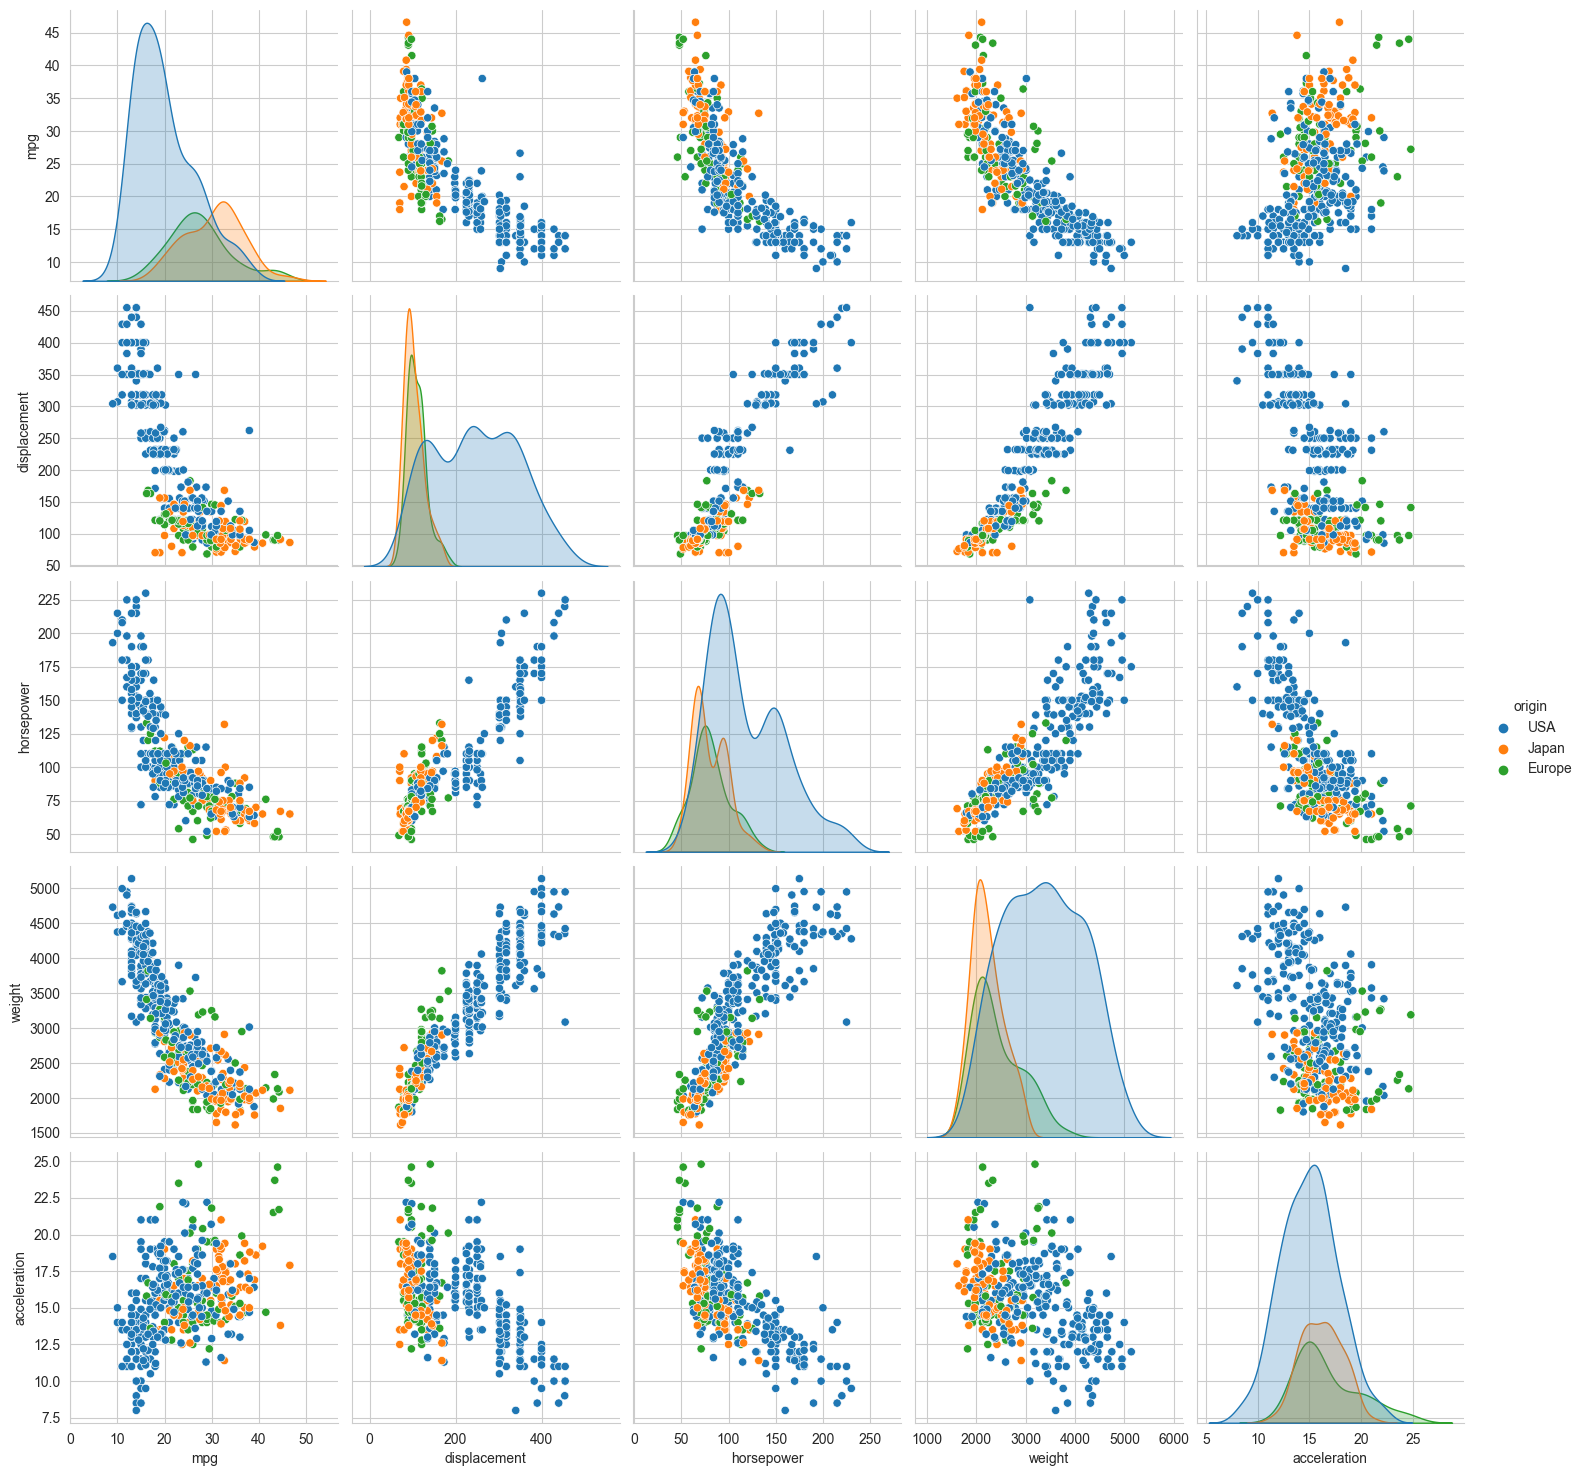

In [5]:
seaborn.set_style("whitegrid")
seaborn.pairplot(mpg, hue='origin', height=3)
plt.show()

## Exercise 2 - Linear and Polynomial Regression (30 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [6]:
#Import necessary methods
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
#Split the data into X and y and use train_test_split to split into training and testing
y = new_mpg.mpg

X = new_mpg.weight.values.reshape(-1,1)
#I chose weight for the single attribute listed in 2.2
#Otherwise the code will go as such
#X = new_mpg.drop('mpg', axis=1) to get the entire dataframe without the prediction column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [8]:
#create a linear regression model
model = LinearRegression()
#fit the model to the data
model.fit(X_train, y_train)

LinearRegression()

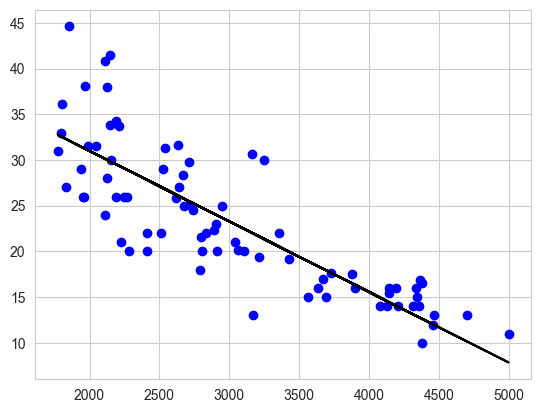

In [9]:
#use the model to predict on the testing set
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')
plt.show()
#https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/
#This had the best results for me in terms of plotting the linear regression.
#I tried following the other two methods in regression_example, but this yielded the best looking plot. 

In [10]:
#MSE Results
from sklearn.metrics import mean_squared_error
import operator

In [11]:
mean_squared_error(y_test, y_pred)

19.984956284921086

### Exercise 2.3 - Polynomial Regression (15 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**

    I think that the lines perfectly reflect the ideal line for the data. The correlation map showed that weight had a very great relation to mpg so it makes sense for these results to appear.

Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


Degree 2

Training MSE: 9.406987648566433

Test MSE: 60.684764771983716


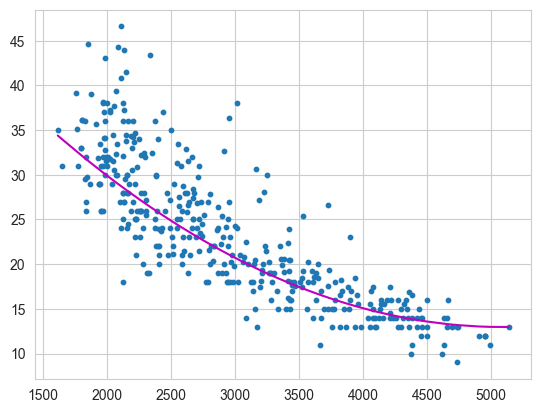

In [53]:
print("Degree 2")
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X.reshape(-1,1))

X_poly_train, X_poly_test, y_train, y_test = X_poly[:-78], X_poly[-78:], y[:-78], y[-78:]

model = LinearRegression()
model.fit(X_poly_train, y_train)
y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)

mse = mean_squared_error(y_train,y_train_pred)
print('\nTraining MSE: %8.15f' % mse)
mse_test = mean_squared_error(y_test,y_test_pred)
print('\nTest MSE: %8.15f' % mse_test)

plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_train_pred), key=sort_axis)
X_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(X_poly_train, y_train_pred, color='m')
plt.show()

Degree 3

Training MSE: 9.261448131126574

Test MSE: 62.346824595020202


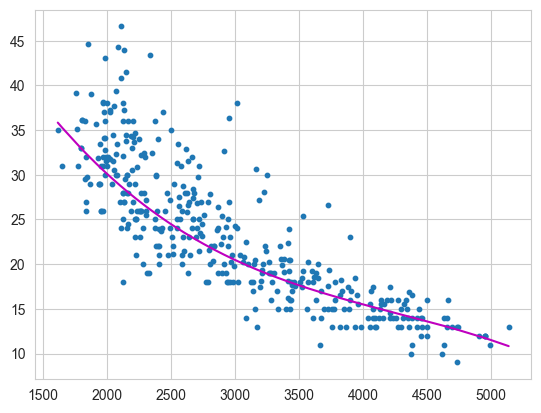

In [32]:
print("Degree 3")
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=3)
X_poly = polynomial_features.fit_transform(X)

X_poly_train, X_poly_test, y_train, y_test = X_poly[:-78], X_poly[-78:], y[:-78], y[-78:]

model = LinearRegression()
model.fit(X_poly_train, y_train)
y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)

mse = mean_squared_error(y_train,y_train_pred)
print('\nTraining MSE: %8.15f' % mse)
mse_test = mean_squared_error(y_test,y_test_pred)
print('\nTest MSE: %8.15f' % mse_test)

plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_train_pred), key=sort_axis)
X_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(X_poly_train, y_train_pred, color='m')
plt.show()

Degree 4

Training MSE: 9.257032940402267

Test MSE: 62.536613476755733


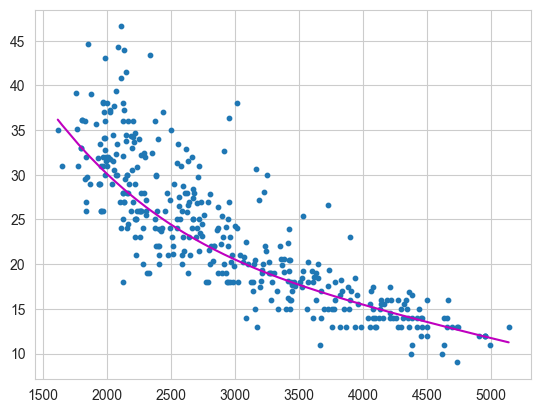

In [33]:
print("Degree 4")
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=4)
X_poly = polynomial_features.fit_transform(X)

X_poly_train, X_poly_test, y_train, y_test = X_poly[:-78], X_poly[-78:], y[:-78], y[-78:]

model = LinearRegression()
model.fit(X_poly_train, y_train)
y_train_pred = model.predict(X_poly_train)
y_test_pred = model.predict(X_poly_test)

mse = mean_squared_error(y_train,y_train_pred)
print('\nTraining MSE: %8.15f' % mse)
mse_test = mean_squared_error(y_test,y_test_pred)
print('\nTest MSE: %8.15f' % mse_test)

plt.scatter(X, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_train_pred), key=sort_axis)
X_poly_train, y_train_pred = zip(*sorted_zip)
plt.plot(X_poly_train, y_train_pred, color='m')
plt.show()

## Exercise 3 - Overfitting and Underfitting (25 points in total)
The fitting dataset contains the actual train and test data spread for a model along with three rotations of the same. The dataset is provided in the Canvas file.

### Exercise 3.1 - sse and variance
Calculate the sse and variance for the three predictions based on the actual data.<br >
Show the calculation for the above metrics.<br >
Highlight the values you get for all three predictions and the actual data. 

In [15]:
fitting = pandas.read_csv('fitting.csv')
fitting = fitting.loc[:, ~fitting.columns.str.contains('^Unnamed')]
#https://stackoverflow.com/questions/43983622/remove-unnamed-columns-in-pandas-dataframe
#To remove all unnamed columns
display(fitting)
predTrainArray = fitting[["Prediction 1 Training", "Prediction 2 Training", "Prediction 3 Training"]]
predTestArray = fitting[["Prediction 1 Test", "Prediction 2 Test", "Prediction 3 Test"]]
trainData = fitting[["Training Data"]]
testData = fitting[["Test Data"]]

predTestArray.dropna()
testData.dropna()

,Training Data,Prediction 1 Training,Prediction 2 Training,Prediction 3 Training,Test Data,Prediction 1 Test,Prediction 2 Test,Prediction 3 Test
0,0.31,0.50,0.47,-0.37,0.38,0.22,0.16,0.85
1,0.39,0.41,0.33,0.34,-0.57,0.08,-0.27,0.43
2,0.22,0.51,0.67,0.38,0.72,-0.88,-0.13,2.67
3,0.16,0.70,0.35,1.37,-0.94,-0.70,-0.13,1.86
4,-0.88,0.46,0.44,1.13,0.62,-1.19,-0.16,-0.13
5,0.79,0.39,0.46,0.72,NaN,NaN,NaN,NaN
6,0.60,0.52,0.67,1.33,NaN,NaN,NaN,NaN
7,-0.76,0.42,0.33,1.06,NaN,NaN,NaN,NaN
8,0.10,0.50,0.51,-0.30,NaN,NaN,NaN,NaN
9,-0.22,0.53,0.60,0.93,NaN,NaN,NaN,NaN


,Test Data
0,0.38
1,-0.57
2,0.72
3,-0.94
4,0.62


In [16]:
print("SSE for Training 1:", numpy.sum((predTrainArray.iloc[:,0] - trainData.iloc[:,0])**2))
print("SSE for Training 2:", numpy.sum((predTrainArray.iloc[:,1] - trainData.iloc[:,0])**2))
print("SSE for Training 3:", numpy.sum((predTrainArray.iloc[:,2] - trainData.iloc[:,0])**2))
print("SSE for Test 1:", numpy.sum((predTestArray.iloc[:,0] - testData.iloc[:,0])**2))
print("SSE for Test 2:", numpy.sum((predTestArray.iloc[:,1] - testData.iloc[:,0])**2))
print("SSE for Test 3:", numpy.sum((predTestArray.iloc[:,2] - testData.iloc[:,0])**2))
print("Var for Model 1:",numpy.sum((predTrainArray.iloc[:,0] - trainData.iloc[:,0])**2)-numpy.sum((predTestArray.iloc[:,0] - testData.iloc[:,0])**2))
print("Var for Model 2:",numpy.sum((predTrainArray.iloc[:,1] - trainData.iloc[:,0])**2)-numpy.sum((predTestArray.iloc[:,1] - testData.iloc[:,0])**2))
print("Var for Model 3:",numpy.sum((predTrainArray.iloc[:,2] - trainData.iloc[:,0])**2)-numpy.sum((predTestArray.iloc[:,2] - testData.iloc[:,0])**2))

SSE for Training 1: 12.2935
SSE for Training 2: 12.336300000000003
SSE for Training 3: 19.1735
SSE for Test 1: 6.3418
SSE for Test 2: 2.1254
SSE for Test 3: 13.425899999999999
Var for Model 1: 5.9517
Var for Model 2: 10.210900000000002
Var for Model 3: 5.747600000000002


### Excercise 3.2 - Justification
Based on the values calculated above classify the predictions into three categories base prediction, overfitting prediction, underfitting prediction. Also provide appropriate justifications for the classifications. 

### Model 1
Model 1 has high bias on the training set but low bias on the testing set. It looks like the model fits somewhat well.
### Model 2
Model 2 has similar bias to model 1, but the test bias is extremely low. This computes high variance, displaying an overfitting of the training data.
### Model 3
Model 3 displays high bias on the training and test set. However, the variance is not as high as Model 2's and is comparative to Model 1's. We can say that there is high bias on the training and test set relative to the other models--therefore model 3 underfits the data.

## Exercise 4 - Outliers (25 points in total)
Now we are going to perform outlier detection using the diabetes dataset. 
The dataset is provided in the Canvas file.

### Exercise 4.1 - box plot
Extract the 'BloodPressure' attribute from the diabetes dataset.<br >
Create a box plot with the 'BloodPressure' attribute.<br >
Highlight the outliers in the box plot with special colors.

In [17]:
diabetes = pandas.read_csv('diabetes.csv')
display(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: >

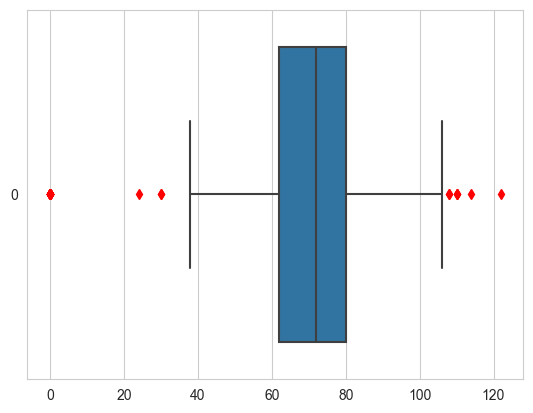

In [18]:
bp = diabetes.BloodPressure
#All outliers are colored red
seaborn.boxplot(bp,orient='h',flierprops={"mfc": "red","mec": "red"})

### Exercise 4.2 - anomaly detection
Extract features 'BMI' and 'Insulin' from the diabetes dataset.<br >
Implement anomaly detection using the One-Class SVM algorithm.<br >
Plot a scatter plot similar to Lecture 2 Slide 11, annotating the outlier data points.

In [19]:
from sklearn.svm import OneClassSVM
from numpy import where

In [20]:
features = ["BMI", "Insulin"]
Data = diabetes[features]
data = Data.to_numpy()

In [21]:
svm = OneClassSVM(kernel='rbf', gamma=0.001,nu=0.03)
svm.fit(data)
pred = svm.predict(data)

In [22]:
anom_index = where(pred==-1)
print(anom_index)
values = data[anom_index]

(array([  8,   9,  13,  18,  49,  60,  81, 145, 162, 228, 231, 247, 248,
       258, 286, 316, 325, 371, 392, 420, 426, 445, 494, 519, 522, 607,
       639, 645, 646, 684, 695, 706, 713, 747, 753], dtype=int64),)


C:\Users\Anthony\AppData\Local\Temp\ipykernel_14692\138830527.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax0.scatter(Data["BMI"], Data["Insulin"], cmap='rainbow')
C:\Users\Anthony\AppData\Local\Temp\ipykernel_14692\138830527.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(values[:,0], values[:,1], cmap='rainbow')


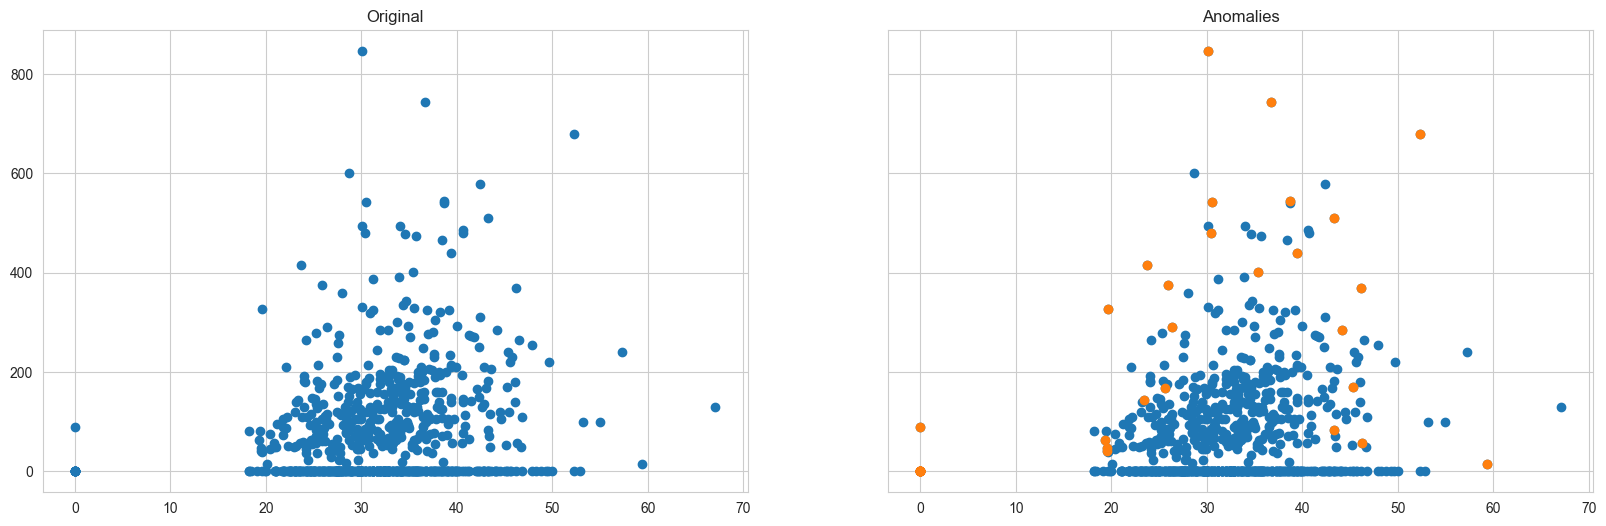

In [23]:
fig, (ax0, ax1)=plt.subplots(1,2, sharey=True, figsize=(20,6))

ax0.set_title('Original')
ax0.scatter(Data["BMI"], Data["Insulin"], cmap='rainbow')

ax1.set_title('Anomalies')
ax1.scatter(data[:,0], data[:,1])
ax1.scatter(values[:,0], values[:,1], cmap='rainbow')